# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from scipy import stats

# Loading Titanic data after EDA

In [3]:
# Let us consider 'titanic' dataset which has been cleaned
titanic = pd.read_csv(r"titanic.csv")
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
773,885,0,3,female,39.0,0,5,29.1250,False,Queenstown,False
774,887,1,1,female,19.0,0,0,30.0000,False,Southampton,True
775,888,0,3,female,21.5,1,2,23.4500,False,Southampton,False
776,889,1,1,male,26.0,0,0,30.0000,True,Cherbourg,True


In [4]:
# Since we are loading csv file we need to drop the extra column created
titanic.drop("Unnamed: 0",axis=1,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     778 non-null    int64  
 1   pclass       778 non-null    int64  
 2   sex          778 non-null    object 
 3   age          778 non-null    float64
 4   sibsp        778 non-null    int64  
 5   parch        778 non-null    int64  
 6   fare         778 non-null    float64
 7   adult_male   778 non-null    bool   
 8   embark_town  778 non-null    object 
 9   alone        778 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 50.3+ KB


In [7]:
# re-convert data types to correct ones aftercsv file load
# Change dtypes of survived, pclass, sibsp, parch to object datatype
titanic[['survived','pclass','sibsp','parch','adult_male','alone']] = titanic[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

# Train_test_split

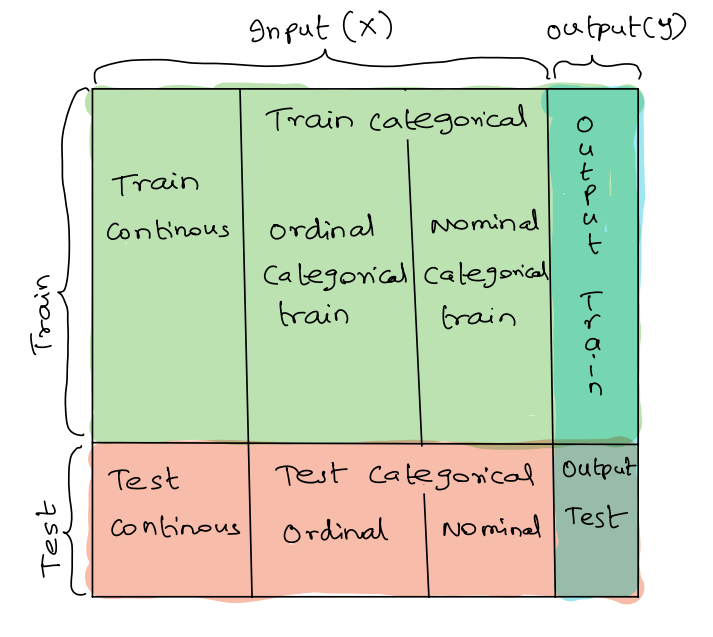

In [8]:
# Define the Input and target variables
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'embark_town', 'alone']]
y = titanic['survived']
len(X),len(y)

(778, 778)

In [9]:
# Splitting the data in to Train and Test both for the input and output variables
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.32)

In [10]:
# Splitting the Train data in to continous
XcontTrain = XTrain.select_dtypes('float64')
XcontTrain

,age,fare
351,35.0,52.0000
383,21.0,7.7333
464,36.0,26.0000
106,20.0,9.8250
129,16.0,9.2167
...,...,...
357,36.0,120.0000
29,25.0,7.8958
348,42.0,227.5250
767,20.0,9.8458


In [11]:
# Splitting Test data in to continous
XcontTest = XTest.select_dtypes('float64')
XcontTest

,age,fare
527,47.0,7.2500
130,24.0,79.2000
628,48.0,52.0000
663,33.0,9.5000
399,45.0,26.2500
...,...,...
547,26.0,16.1000
536,44.0,8.0500
400,20.0,9.5000
515,21.5,14.4583


In [12]:
XcontTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 351 to 487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     529 non-null    float64
 1   fare    529 non-null    float64
dtypes: float64(2)
memory usage: 12.4 KB


In [13]:
# Splitting Train data in to categorical
XcatTrain = XTrain.select_dtypes('object')
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
351,1,female,1,0,False,Southampton,False
383,3,male,0,0,True,Queenstown,True
464,2,female,1,0,False,Southampton,False
106,3,female,1,0,False,Southampton,False
129,3,male,0,0,True,Southampton,True
...,...,...,...,...,...,...,...
357,1,male,1,2,True,Southampton,False
29,3,male,0,0,True,Southampton,True
348,1,female,0,0,False,Cherbourg,True
767,3,male,0,0,True,Southampton,True


In [14]:
# Splitting Test data in to categorical
XcatTest = XTest.select_dtypes('object')
XcatTest

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
527,3,male,0,0,True,Southampton,True
130,1,male,0,0,True,Cherbourg,True
628,1,male,1,0,True,Southampton,False
663,3,male,0,0,True,Southampton,True
399,2,female,1,1,False,Southampton,False
...,...,...,...,...,...,...,...
547,3,female,1,0,False,Southampton,False
536,3,male,0,0,True,Southampton,True
400,3,male,0,0,True,Southampton,True
515,3,female,1,0,False,Cherbourg,False


# Transformation
- We will be using Power Transformer
- Yeo-Johnson Transformer

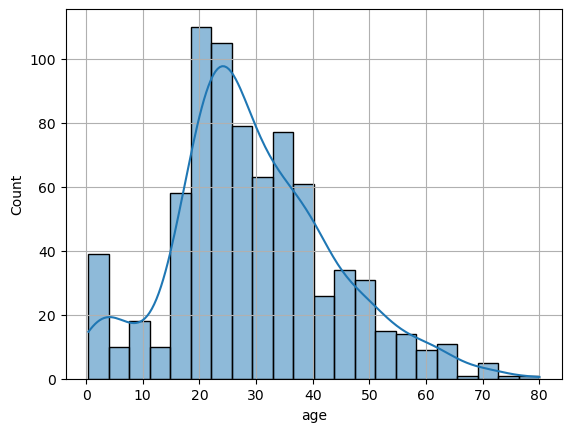

In [15]:
# Check for Normality of age column using the histplot
sns.histplot(titanic.iloc[:,3],kde = 'kind')
plt.grid()

In [16]:
# Age is a slightly skewed

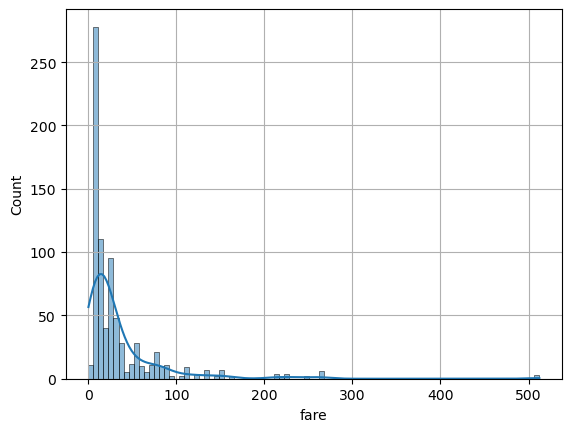

In [17]:
# Check for Normality of fare using the histplot
sns.histplot(titanic.iloc[:,6],kde = 'kind')
plt.grid()

In [18]:
# Fare is highly skewed data so it needs transformation to be more like normal data
# We will use yeo-johnson power transformer on both the continous columns

In [19]:
# We will use Yeo-Johnson Power Transformer
from sklearn.preprocessing import PowerTransformer

In [20]:
# Create an Power Transformer object
yJpT = PowerTransformer()

In [21]:
# We Train the input continous variables with power transformer
yJpT.fit_transform(XcontTrain)

array([[ 0.45764694,  1.03777579],
       [-0.56939908, -0.92465629],
       [ 0.52665783,  0.34779333],
       ...,
       [ 0.93138803,  2.37200756],
       [-0.64826445, -0.66833448],
       [ 2.30988241,  0.34779333]])

In [22]:
# To check what lambas the function used
# Applied for 2 columns so 2 lambdas
yJpT.lambdas_

array([ 0.7478376 , -0.10728915])

In [23]:
XcontTrain.columns, XcontTrain.index

(Index(['age', 'fare'], dtype='object'),
 Int64Index([351, 383, 464, 106, 129, 284, 331, 107, 127, 168,
             ...
             552, 375, 569, 147, 631, 357,  29, 348, 767, 487],
            dtype='int64', length=529))

In [24]:
# We will create a transformed data using fit_transform 
x_df_ContTrain = pd.DataFrame(yJpT.fit_transform(XcontTrain),index = XcontTrain.index,columns = XcontTrain.columns )

In [25]:
# Now we will apply the learning to the test data
x_df_contTest = pd.DataFrame(yJpT.transform(XcontTest),index = XcontTest.index,columns = XcontTest.columns )

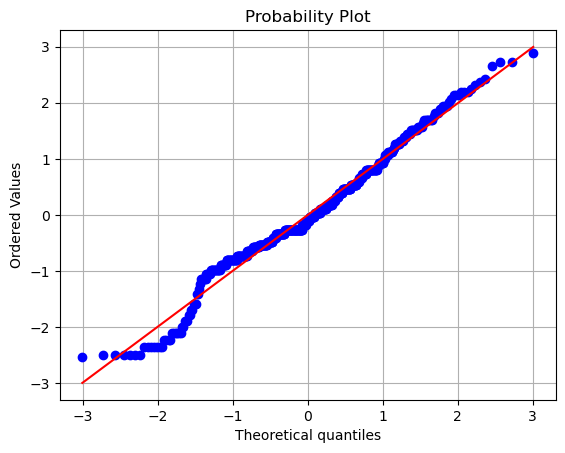

In [26]:
# Check for Normality of Age using the QQ plot
stats.probplot(x_df_ContTrain.iloc[:,0],dist = 'norm', plot=plt)
plt.grid()

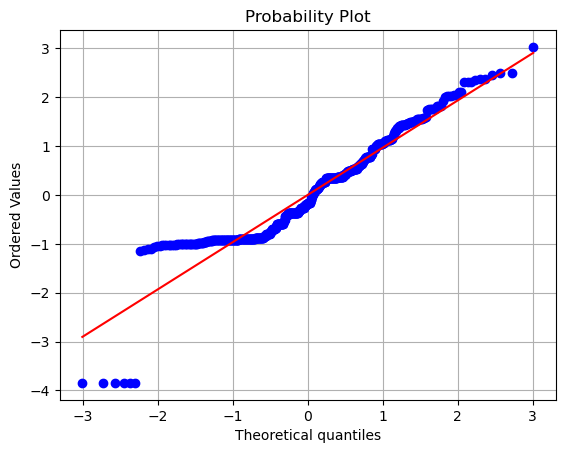

In [27]:
# Check for Normality of fare using the QQ plot
stats.probplot(x_df_ContTrain.iloc[:,1],dist = 'norm', plot=plt)
plt.grid()

In [28]:
# We can see that there is a huge transformation especially for fare that was badly skewed

# Normalization
- Robust Scaler

In [29]:
# Next we would like to scale the data
# For this we need to check is there are any outliers

In [30]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [31]:
len(find_outliers_IQR(titanic['age']))

13

In [32]:
len(find_outliers_IQR(titanic['fare']))

97

<AxesSubplot:>

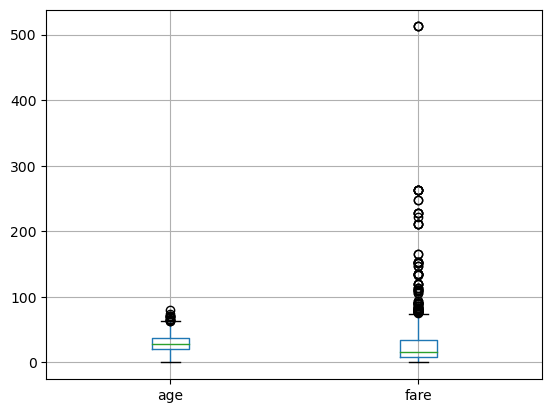

In [33]:
# We can see that there are many outliers in the continous data
# The same can be observed in the boxplots
titanic.boxplot()

In [34]:
# Robust scaler has better way of dealing with marginal outliers 
# So we will go ahead and use Robust Scaler for scaling in the Preprocessing step
from sklearn.preprocessing import RobustScaler

In [35]:
# We will create an object for RobustScaler class
rs = RobustScaler()

In [36]:
# Step 1: We will create a transformed dataframe using fit_transform 
rs_x_df_ContTrain = pd.DataFrame(rs.fit_transform(x_df_ContTrain),index = x_df_ContTrain.index,columns = x_df_ContTrain.columns )
rs_x_df_ContTrain

,age,fare
351,0.490451,0.822398
383,-0.391438,-0.511356
464,0.549708,0.353456
106,-0.459156,-0.338675
129,-0.738764,-0.384797
...,...,...
357,0.549708,1.352042
29,-0.127883,-0.496373
348,0.897235,1.729199
767,-0.459156,-0.337149


In [37]:
# Now we will apply the learning to the test data
rs_x_df_contTest = pd.DataFrame(rs.transform(x_df_contTest),index = x_df_contTest.index,columns = x_df_contTest.columns )
rs_x_df_contTest

,age,fare
527,1.177546,-0.557813
130,-0.192750,1.094033
628,1.232704,0.822398
663,0.370671,-0.362949
399,1.066350,0.360095
...,...,...
547,-0.063643,0.016047
536,1.010296,-0.482432
400,-0.459156,-0.362949
515,-0.357870,-0.060769


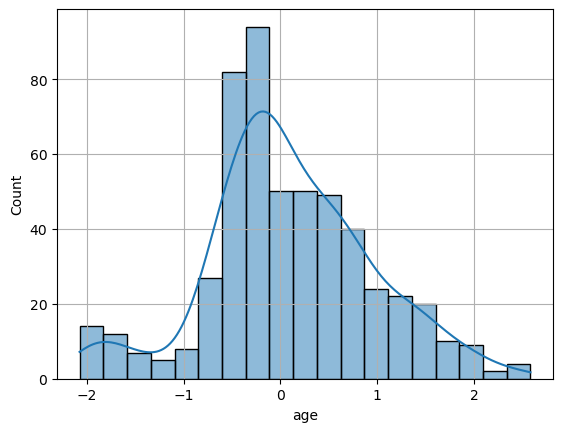

In [38]:
# Check for scaling and Normality using the histplot for age
sns.histplot(rs_x_df_ContTrain.iloc[:,0],kde = 'kind')
plt.grid()

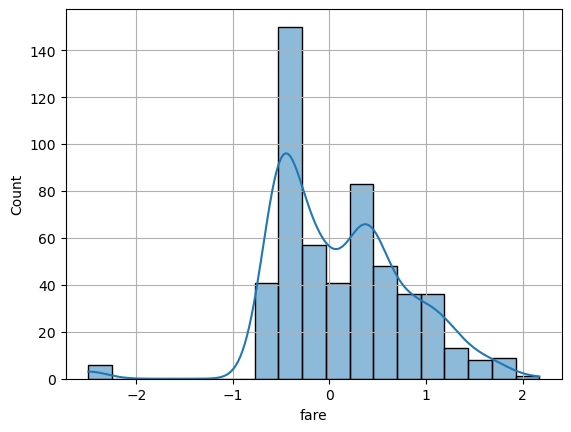

In [39]:
# Check for scaling and Normality using the histplot for fare
sns.histplot(rs_x_df_ContTrain.iloc[:,1],kde = 'kind')
plt.grid()

<AxesSubplot:>

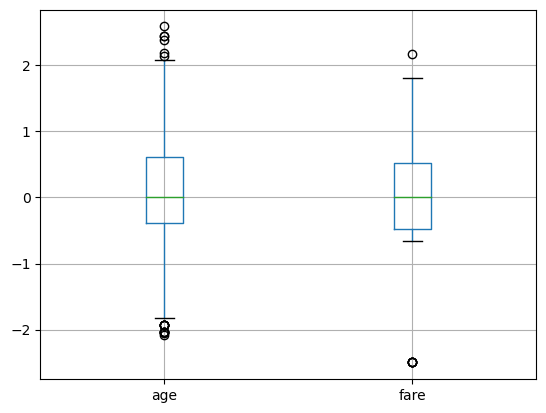

In [40]:
# We see that the data has been scaled well 
# outliers magnitude has been greatly altered so that they will have less impact on output variable
rs_x_df_ContTrain.boxplot()

# Categorical data
- Split to Ordinal vs Nominal

In [41]:
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
351,1,female,1,0,False,Southampton,False
383,3,male,0,0,True,Queenstown,True
464,2,female,1,0,False,Southampton,False
106,3,female,1,0,False,Southampton,False
129,3,male,0,0,True,Southampton,True
...,...,...,...,...,...,...,...
357,1,male,1,2,True,Southampton,False
29,3,male,0,0,True,Southampton,True
348,1,female,0,0,False,Cherbourg,True
767,3,male,0,0,True,Southampton,True


In [42]:
# pclass - ordinal
# sex - Nominal
# sibsp - ordinal
# parch - ordinal
# adult_male = ordinal
# embarked_town - Nominal
# alone - ordinal
# Ordinal:['pclass','sibsp','parch','adult_male','alone']
# Nominal:['sex','embark_town']

In [43]:
# For ordinal columns we use Ordinal Encoding
# For Nominal we use One Hot Encoding, there are limited classes so not going with Leave One Out One Hot Encoding
# First we need to seperate Ordinal and Nominal both for Train and Test

In [44]:
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
351,1,female,1,0,False,Southampton,False
383,3,male,0,0,True,Queenstown,True
464,2,female,1,0,False,Southampton,False
106,3,female,1,0,False,Southampton,False
129,3,male,0,0,True,Southampton,True
...,...,...,...,...,...,...,...
357,1,male,1,2,True,Southampton,False
29,3,male,0,0,True,Southampton,True
348,1,female,0,0,False,Cherbourg,True
767,3,male,0,0,True,Southampton,True


In [45]:
# Split the categorical data for Train in to Ordinal
Ord_XcatTrain= XcatTrain[['pclass','sibsp','parch','adult_male','alone']]
Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
351,1,1,0,False,False
383,3,0,0,True,True
464,2,1,0,False,False
106,3,1,0,False,False
129,3,0,0,True,True
...,...,...,...,...,...
357,1,1,2,True,False
29,3,0,0,True,True
348,1,0,0,False,True
767,3,0,0,True,True


In [46]:
# Split the categorical data for Train in to Nominal
Nom_XcatTrain= XcatTrain[['sex','embark_town']]
Nom_XcatTrain

,sex,embark_town
351,female,Southampton
383,male,Queenstown
464,female,Southampton
106,female,Southampton
129,male,Southampton
...,...,...
357,male,Southampton
29,male,Southampton
348,female,Cherbourg
767,male,Southampton


In [47]:
XcatTest

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
527,3,male,0,0,True,Southampton,True
130,1,male,0,0,True,Cherbourg,True
628,1,male,1,0,True,Southampton,False
663,3,male,0,0,True,Southampton,True
399,2,female,1,1,False,Southampton,False
...,...,...,...,...,...,...,...
547,3,female,1,0,False,Southampton,False
536,3,male,0,0,True,Southampton,True
400,3,male,0,0,True,Southampton,True
515,3,female,1,0,False,Cherbourg,False


In [48]:
# Split the categorical data for Test in to Ordinal
Ord_XcatTest= XcatTest[['pclass','sibsp','parch','adult_male','alone']]
Ord_XcatTest

,pclass,sibsp,parch,adult_male,alone
527,3,0,0,True,True
130,1,0,0,True,True
628,1,1,0,True,False
663,3,0,0,True,True
399,2,1,1,False,False
...,...,...,...,...,...
547,3,1,0,False,False
536,3,0,0,True,True
400,3,0,0,True,True
515,3,1,0,False,False


In [49]:
# Split the categorical data for Test in to Nominal
Nom_XcatTest= XcatTest[['sex','embark_town']]
Nom_XcatTest

,sex,embark_town
527,male,Southampton
130,male,Cherbourg
628,male,Southampton
663,male,Southampton
399,female,Southampton
...,...,...
547,female,Southampton
536,male,Southampton
400,male,Southampton
515,female,Cherbourg


# Ordinal Encoding

In [50]:
# First we will deal with Ordinal Categorical data using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [51]:
# Get the unique columns in all the ordinal categorical columns
for i in Ord_XcatTrain.columns:
    print(i, Ord_XcatTrain[i].unique())

pclass [1 3 2]
sibsp [1 0 3 2 8 4 5]
parch [0 2 1 3 5 4 6]
adult_male [False True]
alone [False True]


In [52]:
# In ordrinal encoding the categories need to be in ascending order
# The order we selected is as below:
# ranked pclass, sibsp, parch bottom to top. 
# Being adult_male not good for survival so False got higher rating
# Being alone not good for survival so False got higher rating
oe = OrdinalEncoder(categories=[[1,2,3],[0,1,2,3,4,5,8],[0,1,2,3,4,5,6],[True,False],[True,False]])

In [53]:
Ord_XcatTrain.index

Int64Index([351, 383, 464, 106, 129, 284, 331, 107, 127, 168,
            ...
            552, 375, 569, 147, 631, 357,  29, 348, 767, 487],
           dtype='int64', length=529)

In [54]:
# We will create a transformed data using fit_transform 
df_Ord_XcatTrain = pd.DataFrame(oe.fit_transform(Ord_XcatTrain),index = Ord_XcatTrain.index,columns = Ord_XcatTrain.columns)
df_Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
351,0.0,1.0,0.0,1.0,1.0
383,2.0,0.0,0.0,0.0,0.0
464,1.0,1.0,0.0,1.0,1.0
106,2.0,1.0,0.0,1.0,1.0
129,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
357,0.0,1.0,2.0,0.0,1.0
29,2.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,1.0,0.0
767,2.0,0.0,0.0,0.0,0.0


In [55]:
# Now we will apply the learning to the test data
df_Ord_XcatTest = pd.DataFrame(oe.fit_transform(Ord_XcatTest),index = Ord_XcatTest.index,columns = Ord_XcatTest.columns)
df_Ord_XcatTest

,pclass,sibsp,parch,adult_male,alone
527,2.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0
628,0.0,1.0,0.0,0.0,1.0
663,2.0,0.0,0.0,0.0,0.0
399,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
547,2.0,1.0,0.0,1.0,1.0
536,2.0,0.0,0.0,0.0,0.0
400,2.0,0.0,0.0,0.0,0.0
515,2.0,1.0,0.0,1.0,1.0


In [56]:
# We can see that the order is as requested
for i in df_Ord_XcatTrain.columns:
    print(i, df_Ord_XcatTrain[i].unique())

pclass [0. 2. 1.]
sibsp [1. 0. 3. 2. 6. 4. 5.]
parch [0. 2. 1. 3. 5. 4. 6.]
adult_male [1. 0.]
alone [1. 0.]


# One Hot Endoding
- Dont have too many classes so we will just use One Hot Encoding
- Used on Nominal Categorical data

In [57]:
# Import module from sklearn library
from sklearn.preprocessing import OneHotEncoder

In [58]:
# Create an object of OneHotEncoder class
# Since we want to use the complete matrix we set sparse = False
ohe = OneHotEncoder(sparse = False)

In [59]:
# We will create a transformed data using fit_transform 
df_Nom_XcatTrain = pd.DataFrame(ohe.fit_transform(Nom_XcatTrain),index = Nom_XcatTrain.index,columns = ohe.get_feature_names_out(Nom_XcatTrain.columns))
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,1.0,0.0,0.0,0.0,1.0
383,0.0,1.0,0.0,1.0,0.0
464,1.0,0.0,0.0,0.0,1.0
106,1.0,0.0,0.0,0.0,1.0
129,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
357,0.0,1.0,0.0,0.0,1.0
29,0.0,1.0,0.0,0.0,1.0
348,1.0,0.0,1.0,0.0,0.0
767,0.0,1.0,0.0,0.0,1.0


In [60]:
# Now we will apply the learning to the test data
df_Nom_XcatTest = pd.DataFrame(ohe.transform(Nom_XcatTest),index = Nom_XcatTest.index,columns = ohe.get_feature_names_out(Nom_XcatTest.columns))
df_Nom_XcatTest

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
527,0.0,1.0,0.0,0.0,1.0
130,0.0,1.0,1.0,0.0,0.0
628,0.0,1.0,0.0,0.0,1.0
663,0.0,1.0,0.0,0.0,1.0
399,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
547,1.0,0.0,0.0,0.0,1.0
536,0.0,1.0,0.0,0.0,1.0
400,0.0,1.0,0.0,0.0,1.0
515,1.0,0.0,1.0,0.0,0.0


In [61]:
# We can check that the One-Hot Encoding is performed on Nominal Categorical Train and Test sets
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,1.0,0.0,0.0,0.0,1.0
383,0.0,1.0,0.0,1.0,0.0
464,1.0,0.0,0.0,0.0,1.0
106,1.0,0.0,0.0,0.0,1.0
129,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
357,0.0,1.0,0.0,0.0,1.0
29,0.0,1.0,0.0,0.0,1.0
348,1.0,0.0,1.0,0.0,0.0
767,0.0,1.0,0.0,0.0,1.0


In [62]:
df_Nom_XcatTest

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
527,0.0,1.0,0.0,0.0,1.0
130,0.0,1.0,1.0,0.0,0.0
628,0.0,1.0,0.0,0.0,1.0
663,0.0,1.0,0.0,0.0,1.0
399,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
547,1.0,0.0,0.0,0.0,1.0
536,0.0,1.0,0.0,0.0,1.0
400,0.0,1.0,0.0,0.0,1.0
515,1.0,0.0,1.0,0.0,0.0


# Input Variable Dataset I 
- Creating a Dataset of Un-Tranformed and Un-Scaled continous variables and Encoded categorical variables
- That is continous variables are not changed only categorical encoding is done

In [63]:
# From above we will be using following DataFrames
# for Input Training : XcontTrain,df_Ord_XcatTrain,df_Nom_XcatTrain
# for Input Testing : XcontTest,df_Ord_XcatTest,df_Nom_XcatTest

In [64]:
df_Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
351,0.0,1.0,0.0,1.0,1.0
383,2.0,0.0,0.0,0.0,0.0
464,1.0,1.0,0.0,1.0,1.0
106,2.0,1.0,0.0,1.0,1.0
129,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
357,0.0,1.0,2.0,0.0,1.0
29,2.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,1.0,0.0
767,2.0,0.0,0.0,0.0,0.0


In [65]:
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,1.0,0.0,0.0,0.0,1.0
383,0.0,1.0,0.0,1.0,0.0
464,1.0,0.0,0.0,0.0,1.0
106,1.0,0.0,0.0,0.0,1.0
129,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
357,0.0,1.0,0.0,0.0,1.0
29,0.0,1.0,0.0,0.0,1.0
348,1.0,0.0,1.0,0.0,0.0
767,0.0,1.0,0.0,0.0,1.0


In [66]:
# Concatenating Ordinal and Nominal Categorical columns
# For Train dataset 
ds1_Xcat_Train = pd.concat([df_Ord_XcatTrain,df_Nom_XcatTrain],axis=1)
ds1_Xcat_Train

,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
383,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
464,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
106,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
129,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
357,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
29,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
348,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
767,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
# Concatenating Ordinal and Nominal Categorical columns
# For Test dataset 
ds1_Xcat_Test = pd.concat([df_Ord_XcatTest,df_Nom_XcatTest],axis=1)
ds1_Xcat_Test

,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
527,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
628,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
663,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
399,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
547,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
536,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
400,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
515,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [68]:
# Concatenating Continous and Categorical columns
# For Train dataset 
ds1_X_Train = pd.concat([XcontTrain,ds1_Xcat_Train],axis=1)
ds1_X_Train

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,35.0,52.0000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
383,21.0,7.7333,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
464,36.0,26.0000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
106,20.0,9.8250,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
129,16.0,9.2167,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
357,36.0,120.0000,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
29,25.0,7.8958,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
348,42.0,227.5250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
767,20.0,9.8458,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [69]:
# Concatenating Continous and Categorical columns
# For Test dataset 
ds1_X_Test = pd.concat([XcontTest,ds1_Xcat_Test],axis=1)
ds1_X_Test

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
527,47.0,7.2500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
130,24.0,79.2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
628,48.0,52.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
663,33.0,9.5000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
399,45.0,26.2500,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
547,26.0,16.1000,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
536,44.0,8.0500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
400,20.0,9.5000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
515,21.5,14.4583,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [70]:
# Dataset I is ready with ds1_X_Train, ds1_X_Test
# yTrain and yTest are still from the cleaned Titanic Dataset i.e 'survived' column
# This is a categorical column so that task is Classfication
# We will use both 'Logistic Regression' and 'Decision Tree Classifier' to check 'accuracy score' and read 'confusion matrix'

# Input Variable Dataset II 
- Creating a Dataset of Tranformed and Scaled continous variables and Encoded categorical variables

In [71]:
# From above we will be using following DataFrames
# for Input Training : rs_x_df_ContTrain,df_Ord_XcatTrain,df_Nom_XcatTrain
# for Input Testing : rs_x_df_contTest,df_Ord_XcatTest,df_Nom_XcatTest

In [72]:
# Categorical columns are same for Dataset I and Dataset II
# So we will concat that categorical data to Scaled and Transformed contionous data

In [73]:
# Concatenating Continous and Categorical columns
# For Train dataset 
ds2_X_Train = pd.concat([rs_x_df_ContTrain,ds1_Xcat_Train],axis=1)
ds2_X_Train

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
351,0.490451,0.822398,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
383,-0.391438,-0.511356,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
464,0.549708,0.353456,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
106,-0.459156,-0.338675,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
129,-0.738764,-0.384797,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.549708,1.352042,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
29,-0.127883,-0.496373,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
348,0.897235,1.729199,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
767,-0.459156,-0.337149,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [74]:
# Concatenating Continous and Categorical columns
# For Test dataset 
ds2_X_Test = pd.concat([rs_x_df_contTest,ds1_Xcat_Test],axis=1)
ds2_X_Test

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
527,1.177546,-0.557813,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
130,-0.192750,1.094033,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
628,1.232704,0.822398,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
663,0.370671,-0.362949,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
399,1.066350,0.360095,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
547,-0.063643,0.016047,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
536,1.010296,-0.482432,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
400,-0.459156,-0.362949,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
515,-0.357870,-0.060769,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [75]:
# Dataset II is ready with ds2_X_Train, ds2_X_Test
# yTrain and yTest are still from the cleaned Titanic Dataset i.e 'survived' column
# This is a categorical column so that task is Classfication
# We will use both 'Logistic Regression' and 'Decision Tree Classifier' to check 'accuracy score' and read 'confusion matrix'

# Evaluation will follow Model Creation

# Accuracy Check

In [76]:
from sklearn.metrics import accuracy_score as acs

# We use confusion matrix to see what the predictions were

In [77]:
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [78]:
# Import your model
from sklearn.linear_model import LogisticRegression

# Logistic Regression on only Encoded Titanic dataset

In [79]:
# We create a Logistic Regression object
lr = LogisticRegression()

In [80]:
type(ds1_X_Train)

pandas.core.frame.DataFrame

In [81]:
# fit function is not accepting object type so converting to int
yTrain = yTrain.astype(int)
yTest = yTest.astype(int)

In [82]:
type(yTrain)

pandas.core.series.Series

In [83]:
# Fit our Non Transformed, Non Scaled, Encoded training data
lr.fit(ds1_X_Train,yTrain)

C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds1_X_Train and ds1_X_Test and we compare these
lr_yTrainPred_org = lr.predict(ds1_X_Train)
lr_yTestPred_org = lr.predict(ds1_X_Test)

In [86]:
acs(yTrain,lr_yTrainPred_org)

0.8185255198487713

In [87]:
acs(yTest,lr_yTestPred_org)

0.7911646586345381

In [89]:
# For train data we have an accuracy of 82% and for test data we have a accuracy of 79% 
# There is not much dip in accuracy

In [90]:
confusion_matrix(yTrain,lr_yTrainPred_org)

array([[281,  42],
       [ 54, 152]], dtype=int64)

In [91]:
yTrain.value_counts()

0    323
1    206
Name: survived, dtype: int64

In [92]:
# Conclusions from confusion_matrix for train data
# out of 323 Dead 281 were predicted correct and 42 were predicted wrong
# out of 206 survived 152 were predicted correct and 54 were predicted wrong

In [93]:
confusion_matrix(yTest,lr_yTestPred_org)

array([[115,  17],
       [ 35,  82]], dtype=int64)

In [94]:
yTest.value_counts()

0    132
1    117
Name: survived, dtype: int64

In [95]:
# Conclusions from confusion_matrix for train data
# out of 132 Dead 115 were predicted correct and 17 were predicted wrong
# out of 117 survived 82 were predicted correct and 35 were predicted wrong

# Logistic Regression on Transformed and Encoded Titanic Dataset

In [96]:
# We create a Logistic Regression object
lr1 = LogisticRegression()

In [97]:
# Fit our Transformed, Scaled, Encoded training data
lr1.fit(ds2_X_Train,yTrain)

LogisticRegression()

In [98]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds2_X_Train and ds2_X_Test and we compare these
lr_yTrainPred_tra = lr1.predict(ds2_X_Train)
lr_yTestPred_tra = lr1.predict(ds2_X_Test)

In [99]:
acs(yTrain,lr_yTrainPred_tra)

0.8185255198487713

In [100]:
acs(yTest,lr_yTestPred_tra)

0.7911646586345381

In [105]:
# For train data we have an accuracy of 82% and for test data we have a accuracy of 79% 
# There is not much dip in accuracy

In [106]:
confusion_matrix(yTrain,lr_yTrainPred_tra)

array([[281,  42],
       [ 54, 152]], dtype=int64)

In [107]:
# Conclusions from confusion_matrix for train data
# out of 323 Dead 281 were predicted correct and 42 were predicted wrong
# out of 206 survived 152 were predicted correct and 54 were predicted wrong

In [108]:
confusion_matrix(yTest,lr_yTestPred_tra)

array([[114,  18],
       [ 34,  83]], dtype=int64)

In [109]:
# Conclusions from confusion_matrix for train data
# out of 132 Dead 114 were predicted correct and 18 were predicted wrong
# out of 117 survived 83 were predicted correct and 34 were predicted wrong

# Decision Tree Classifier

In [110]:
# Import your model Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier on only Encoded Titanic dataset

In [111]:
# Create an object of DecisionTreeClassifier class
dtc = DecisionTreeClassifier()

In [112]:
# Fit our Non Transformed, Non Scaled, Encoded training data
dtc.fit(ds1_X_Train,yTrain)

DecisionTreeClassifier()

In [113]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds1_X_Train and ds1_X_Test and we compare these
dtc_yTrainPred_org = dtc.predict(ds1_X_Train)
dtc_yTestPred_org = dtc.predict(ds1_X_Test)

In [114]:
acs(yTrain,dtc_yTrainPred_org)

0.9829867674858223

In [115]:
acs(yTest,dtc_yTestPred_org)

0.7389558232931727

In [116]:
# For train data we have an accuracy of 98% and for test data we have a accuracy of 74% only
# There might be a dip in accuracy because of overfitting

In [117]:
confusion_matrix(yTrain,dtc_yTrainPred_org)

array([[323,   0],
       [  9, 197]], dtype=int64)

In [118]:
# Conclusions from confusion_matrix for train data
# out of 323 Dead All were predicted correct
# out of 226 survived 197 were predicted correct and 9 were predicted wrong

In [119]:
confusion_matrix(yTest,dtc_yTestPred_org)

array([[105,  27],
       [ 38,  79]], dtype=int64)

In [120]:
# Conclusions from confusion_matrix for train data
# out of 132 Dead 105 were predicted correct and 27 were predicted wrong
# out of 117 survived 79 were predicted correct and 38 were predicted wrong

# Decision Tree Classifier on Transformed and Encoded Titanic Dataset

In [121]:
# Create an object of DecisionTreeClassifier class
dtc1 = DecisionTreeClassifier()

In [122]:
# Fit our Transformed, Scaled, Encoded training data
dtc1.fit(ds2_X_Train,yTrain)

DecisionTreeClassifier()

In [123]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds2_X_Train and ds2_X_Test and we compare these
dtc_yTrainPred_tra = dtc1.predict(ds2_X_Train)
dtc_yTestPred_tra = dtc1.predict(ds2_X_Test)

In [124]:
acs(yTrain,dtc_yTrainPred_tra)

0.9829867674858223

In [125]:
acs(yTest,dtc_yTestPred_tra)

0.7429718875502008

In [126]:
# For train data we have an accuracy of 98% and for test data we have a accuracy of 74%
# The drop in test data accuracy might be because of overfitting

In [127]:
confusion_matrix(yTrain,dtc_yTrainPred_tra)

array([[323,   0],
       [  9, 197]], dtype=int64)

In [128]:
# Conclusions from confusion_matrix for train data
# out of 323 Dead all were predicted correct
# out of 216 survived 197 were predicted correct and 9 were predicted wrong

In [129]:
confusion_matrix(yTest,dtc_yTestPred_tra)

array([[106,  26],
       [ 38,  79]], dtype=int64)

In [130]:
# Conclusions from confusion_matrix for train data
# out of 132 Dead 106 were predicted correct and 26 were predicted wrong
# out of 117 survived 79 were predicted correct and 38 were predicted wrong

# Inference on Titanic Dataset 
- with Logistic Regression 
- with Decision Tree Classifier

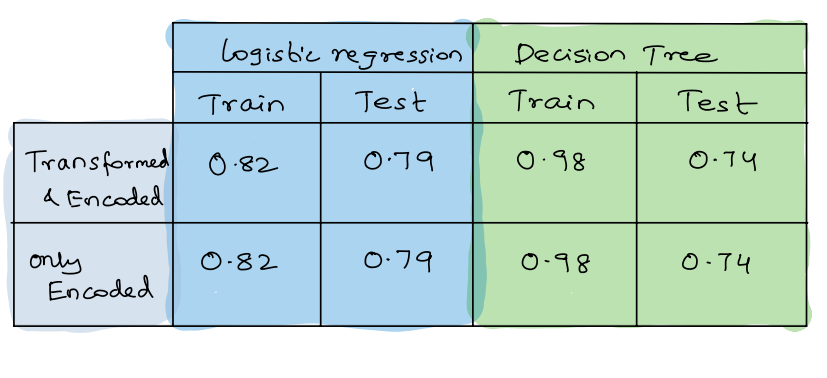

# Conclusions:
- For Titanic Dataset there is not much difference with respect to Transformation and Scaling 
- This might be because the range of age and fare is not too high so scaling did not have major impact
- In regards to Transformation the age was pretty close to normal before also, with respect to fare normalization did help, but
  did not leave much impact on model predictions
- When it comes to discussing which model worked better in prediction we see that when it comes to training Decision Tree
    worked wonders but at the time of prediction on unseen test data the accuracy dropped. One of the reasons might be 
    overfitting of the training model with Decision Tree Classifier.
- Logistic Regression though had a low accuracy levels compared to Decision Tree w.r.t Training data but when it comes to 
    unseen test data there was not much drop in accuracy levels of prediction.
- Finally we can conclude that Logistic Regression would be a better model to go with for Titanic Dataset.